In [5]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.insert(1, '../')

In [2]:
sys.path

['/home/son/Desktop/Research/YOLO_ATTACK_GRAD/unet',
 '../',
 '/home/son/miniconda3/envs/yolo8/lib/python311.zip',
 '/home/son/miniconda3/envs/yolo8/lib/python3.11',
 '/home/son/miniconda3/envs/yolo8/lib/python3.11/lib-dynload',
 '',
 '/home/son/miniconda3/envs/yolo8/lib/python3.11/site-packages']

In [25]:
data_root = "../data/annotations_trainval2017/"
train_data_json_path = data_root + 'annotations/instances_train2017.json'
val_data_json_path = data_root + 'annotations/instances_val2017.json'

In [40]:
# Reading the json file
with open(train_data_json_path, 'r') as f_train:
    root_train = json.load(f_train)

with open(val_data_json_path, 'r') as f_val:
    root_val = json.load(f_val)

root_train.keys(), root_val.keys()

(dict_keys(['info', 'licenses', 'images', 'annotations', 'categories']),
 dict_keys(['info', 'licenses', 'images', 'annotations', 'categories']))

In [44]:
n_images = len(root_train['images'])
n_boxes = len(root_train['annotations'])
n_categ = len(root_train['categories'])

# height, width
heights = [x['height'] for x in root_train['images']]
widths = [x['width'] for x in root_train['images']]

print('########### Training data ###########')
print('Number of images: ',n_images)
print('Number of bounding boxes: ', n_boxes)
print('Number of classes: ', n_categ)
print(f'Max, min, avg height: {max(heights)}, {min(heights)}, {int(sum(heights)/len(heights))}')
print(f'Max, min, avg width: {max(widths)}, {min(widths)}, {int(sum(widths)/len(widths))}')

########### Training data ###########
Number of images:  118287
Number of bounding boxes:  860001
Number of classes:  80
Max, min, avg height: 640, 51, 484
Max, min, avg width: 640, 59, 577


In [45]:
n_images = len(root_val['images'])
n_boxes = len(root_val['annotations'])
n_categ = len(root_val['categories'])

# height, width
heights = [x['height'] for x in root_val['images']]
widths = [x['width'] for x in root_val['images']]

print('########### Validation data ###########')
print('Number of images: ',n_images)
print('Number of bounding boxes: ', n_boxes)
print('Number of classes: ', n_categ)
print(f'Max, min, avg height: {max(heights)}, {min(heights)}, {int(sum(heights)/len(heights))}')
print(f'Max, min, avg width: {max(widths)}, {min(widths)}, {int(sum(widths)/len(widths))}')

########### Validation data ###########
Number of images:  5000
Number of bounding boxes:  36781
Number of classes:  80
Max, min, avg height: 640, 145, 483
Max, min, avg width: 640, 200, 573


# Distribution of objects across images

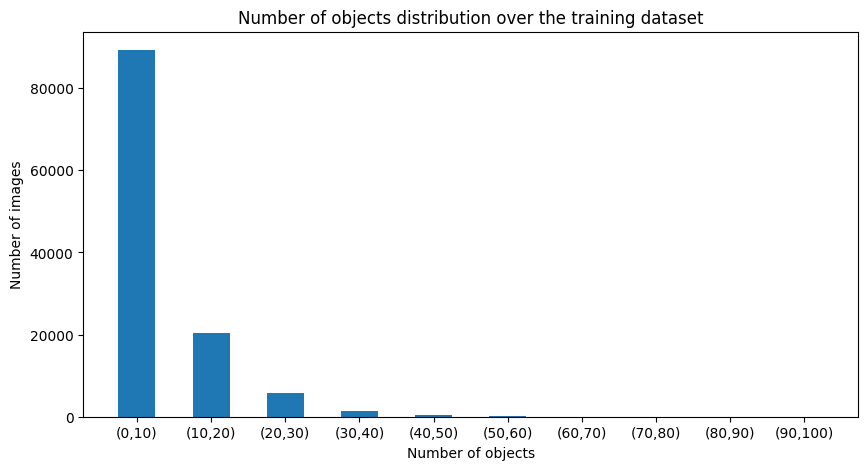

Number of images having atleast one box:  117266
Min number of boxes per image:  1
Max number of boxes per image:  93
Avg number of boxes per image:  7


In [48]:
img2nboxes = {} # mapping "image id" to "number of boxes"

for ann in root_train['annotations']:
    img_id = ann['image_id']
    
    if img_id in img2nboxes.keys():
        img2nboxes[img_id] += 1
    else:
        img2nboxes[img_id] = 1

nboxes_list = list(img2nboxes.values())

min_nboxes = min(nboxes_list)
max_nboxes = max(nboxes_list)
avg_nboxes = int(sum(nboxes_list)/len(nboxes_list))

out = pd.cut(nboxes_list, bins=np.arange(0,max_nboxes+10,10), include_lowest=True)

counts = out.value_counts().values
labels = [(int(i.left),int(i.right)) for i in out.value_counts().index.categories]

graph_xind = [i[0] for i in labels] 
ticks = [ '('+str(i[0])+','+ str(i[1])+')' for i in labels]

plt.figure(figsize=(10,5))
plt.bar(graph_xind, counts, tick_label=ticks, width=5)
plt.xlabel('Number of objects')
plt.ylabel('Number of images')
plt.title('Number of objects distribution over the training dataset')
plt.show()

print("Number of images having atleast one box: ", len(nboxes_list))
print("Min number of boxes per image: ", min_nboxes)
print("Max number of boxes per image: ", max_nboxes)
print("Avg number of boxes per image: ", avg_nboxes)

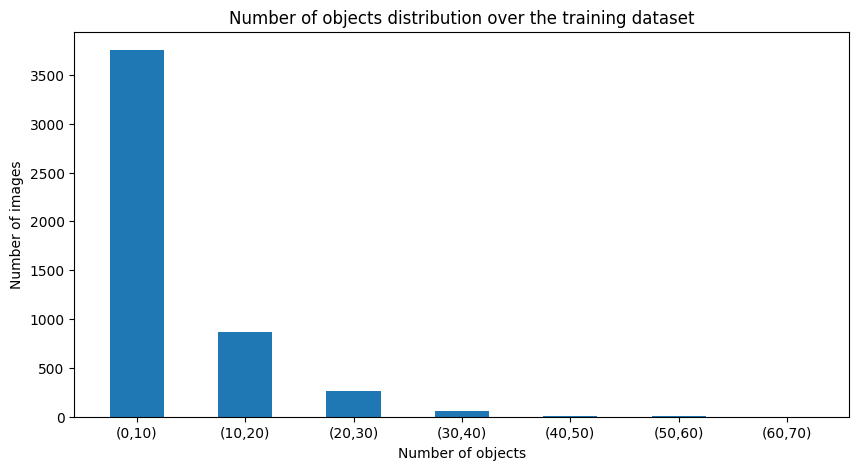

Number of images having atleast one box:  4952
Min number of boxes per image:  1
Max number of boxes per image:  63
Avg number of boxes per image:  7


In [49]:
img2nboxes = {} # mapping "image id" to "number of boxes"

for ann in root_val['annotations']:
    img_id = ann['image_id']
    
    if img_id in img2nboxes.keys():
        img2nboxes[img_id] += 1
    else:
        img2nboxes[img_id] = 1

nboxes_list = list(img2nboxes.values())

min_nboxes = min(nboxes_list)
max_nboxes = max(nboxes_list)
avg_nboxes = int(sum(nboxes_list)/len(nboxes_list))

out = pd.cut(nboxes_list, bins=np.arange(0,max_nboxes+10,10), include_lowest=True)

counts = out.value_counts().values
labels = [(int(i.left),int(i.right)) for i in out.value_counts().index.categories]

graph_xind = [i[0] for i in labels] 
ticks = [ '('+str(i[0])+','+ str(i[1])+')' for i in labels]

plt.figure(figsize=(10,5))
plt.bar(graph_xind, counts, tick_label=ticks, width=5)
plt.xlabel('Number of objects')
plt.ylabel('Number of images')
plt.title('Number of objects distribution over the training dataset')
plt.show()

print("Number of images having atleast one box: ", len(nboxes_list))
print("Min number of boxes per image: ", min_nboxes)
print("Max number of boxes per image: ", max_nboxes)
print("Avg number of boxes per image: ", avg_nboxes)

# Đếm số lượng class

In [23]:
f_coco_label = open('coco_labels.txt')
coco_label = {}
for line in f_coco_label.readlines():
    id, name = line.strip().split(":")
    coco_label[int(id)] = name.strip()

coco_label

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [27]:
label_path = '/home/son/Desktop/Research/YOLO_ATTACK_GRAD/unet/labels'
train_path = os.path.join(label_path, 'train2017')
val_path = os.path.join(label_path, 'val2017')


### Validation set

Text(0.5, 1.0, 'Distribution of class in validation set')

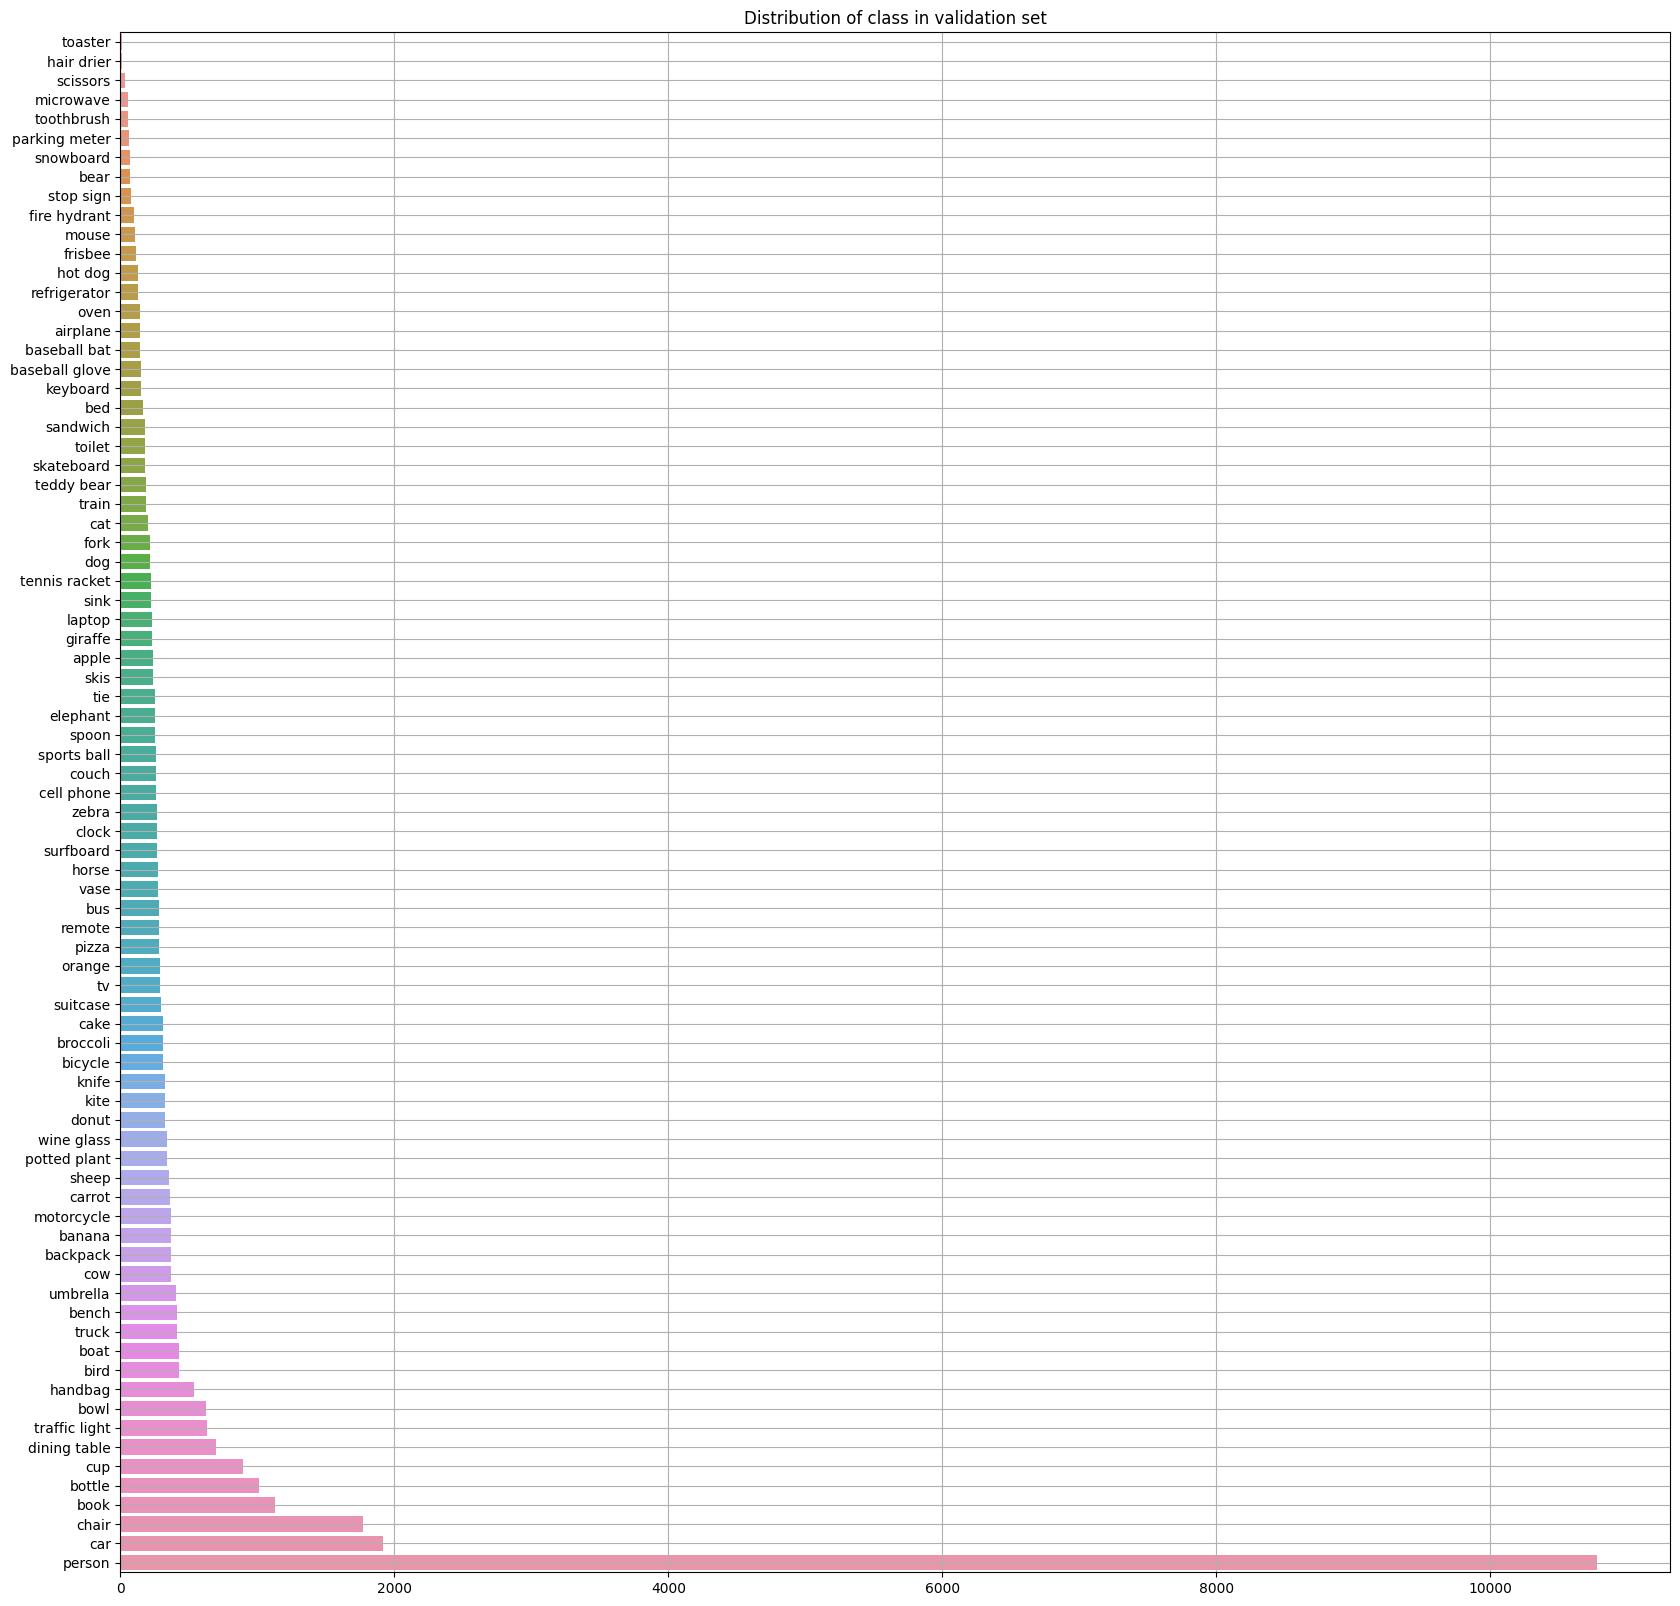

In [46]:
coco80_train = {}
coco80_val = {}


for label_file in sorted(os.listdir(val_path)):
    label_file_path = open(os.path.join(val_path, label_file))
    for line in label_file_path.readlines():
        cls, x, y, w, h = line.strip().split()
        class_name = coco_label[int(cls)]
        if class_name not in coco80_val:
            coco80_val[class_name] = 1
        else:
            coco80_val[class_name] += 1
            
coco80_val = dict(sorted(coco80_val.items(), key=lambda item: item[1]))
classes = list(coco80_val.keys())
count = list(coco80_val.values())

plt.figure(figsize=(20, 20))
sns.barplot(y = classes, x= count, orient='h')
plt.grid(True)
plt.title("Distribution of class in validation set")

### Resample validation set

In [49]:
sampled_data_val = {}

for cls, cnt in coco80_val.items():
    if cnt >= 1000:
        sampled_data_val[cls] = int(cnt * 0.3)
    else:
        sampled_data_val[cls] = int(cnt * 0.5)

sampled_val = []
for label_file in sorted(os.listdir(val_path)):
    label_file_path = open(os.path.join(val_path, label_file))
    flag = True
    one_file = {}
    for line in label_file_path.readlines():
        cls, x, y, w, h = line.strip().split()
        class_name = coco_label[int(cls)]
        if class_name not in one_file:
            one_file[class_name] = 1
        else:
            one_file[class_name] += 1
    
    for k, v in one_file.items():
        if sampled_data_val[k] - v < 0:
            flag = False
            break
    if flag:
        for k, v in one_file.items():
            sampled_data_val[k] -= v
        sampled_val.append(label_file)

In [63]:
len(sampled_val)

2241

Text(0.5, 1.0, 'Distribution of class in validation set')

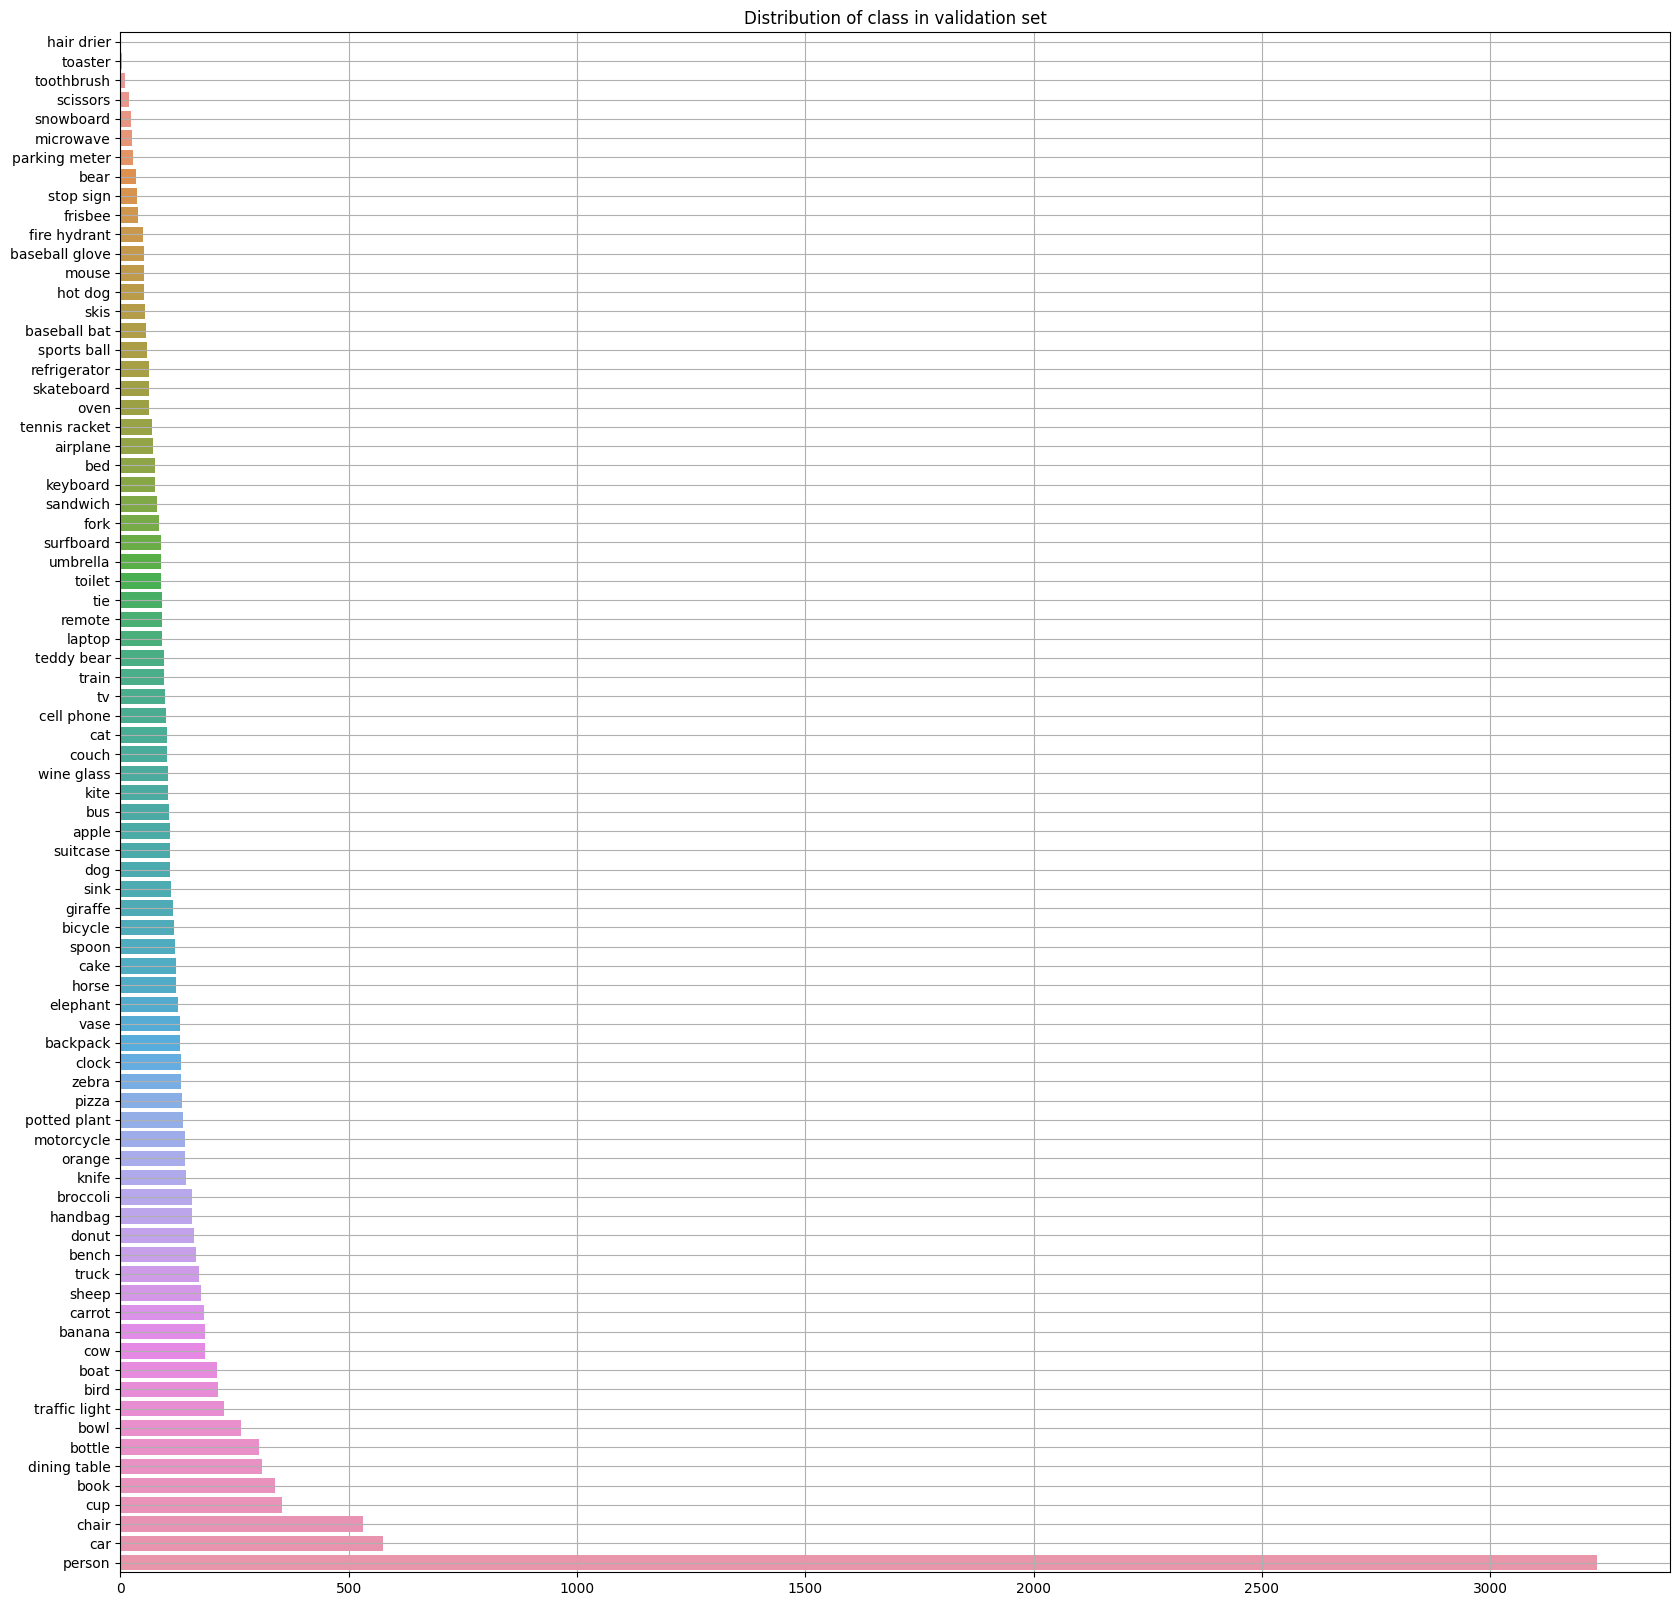

In [51]:
sampled_coco80_val = {}

for label_file in sampled_val:
    label_file_path = open(os.path.join(val_path, label_file))
    for line in label_file_path.readlines():
        cls, x, y, w, h = line.strip().split()
        class_name = coco_label[int(cls)]
        if class_name not in sampled_coco80_val:
            sampled_coco80_val[class_name] = 1
        else:
            sampled_coco80_val[class_name] += 1
            
sampled_coco80_val = dict(sorted(sampled_coco80_val.items(), key=lambda item: item[1]))
classes = list(sampled_coco80_val.keys())
count = list(sampled_coco80_val.values())

plt.figure(figsize=(20, 20))
sns.barplot(y = classes, x= count, orient='h')
plt.grid(True)
plt.title("Distribution of class in validation set")

### Training set

Text(0.5, 1.0, 'Distribution of class in training set')

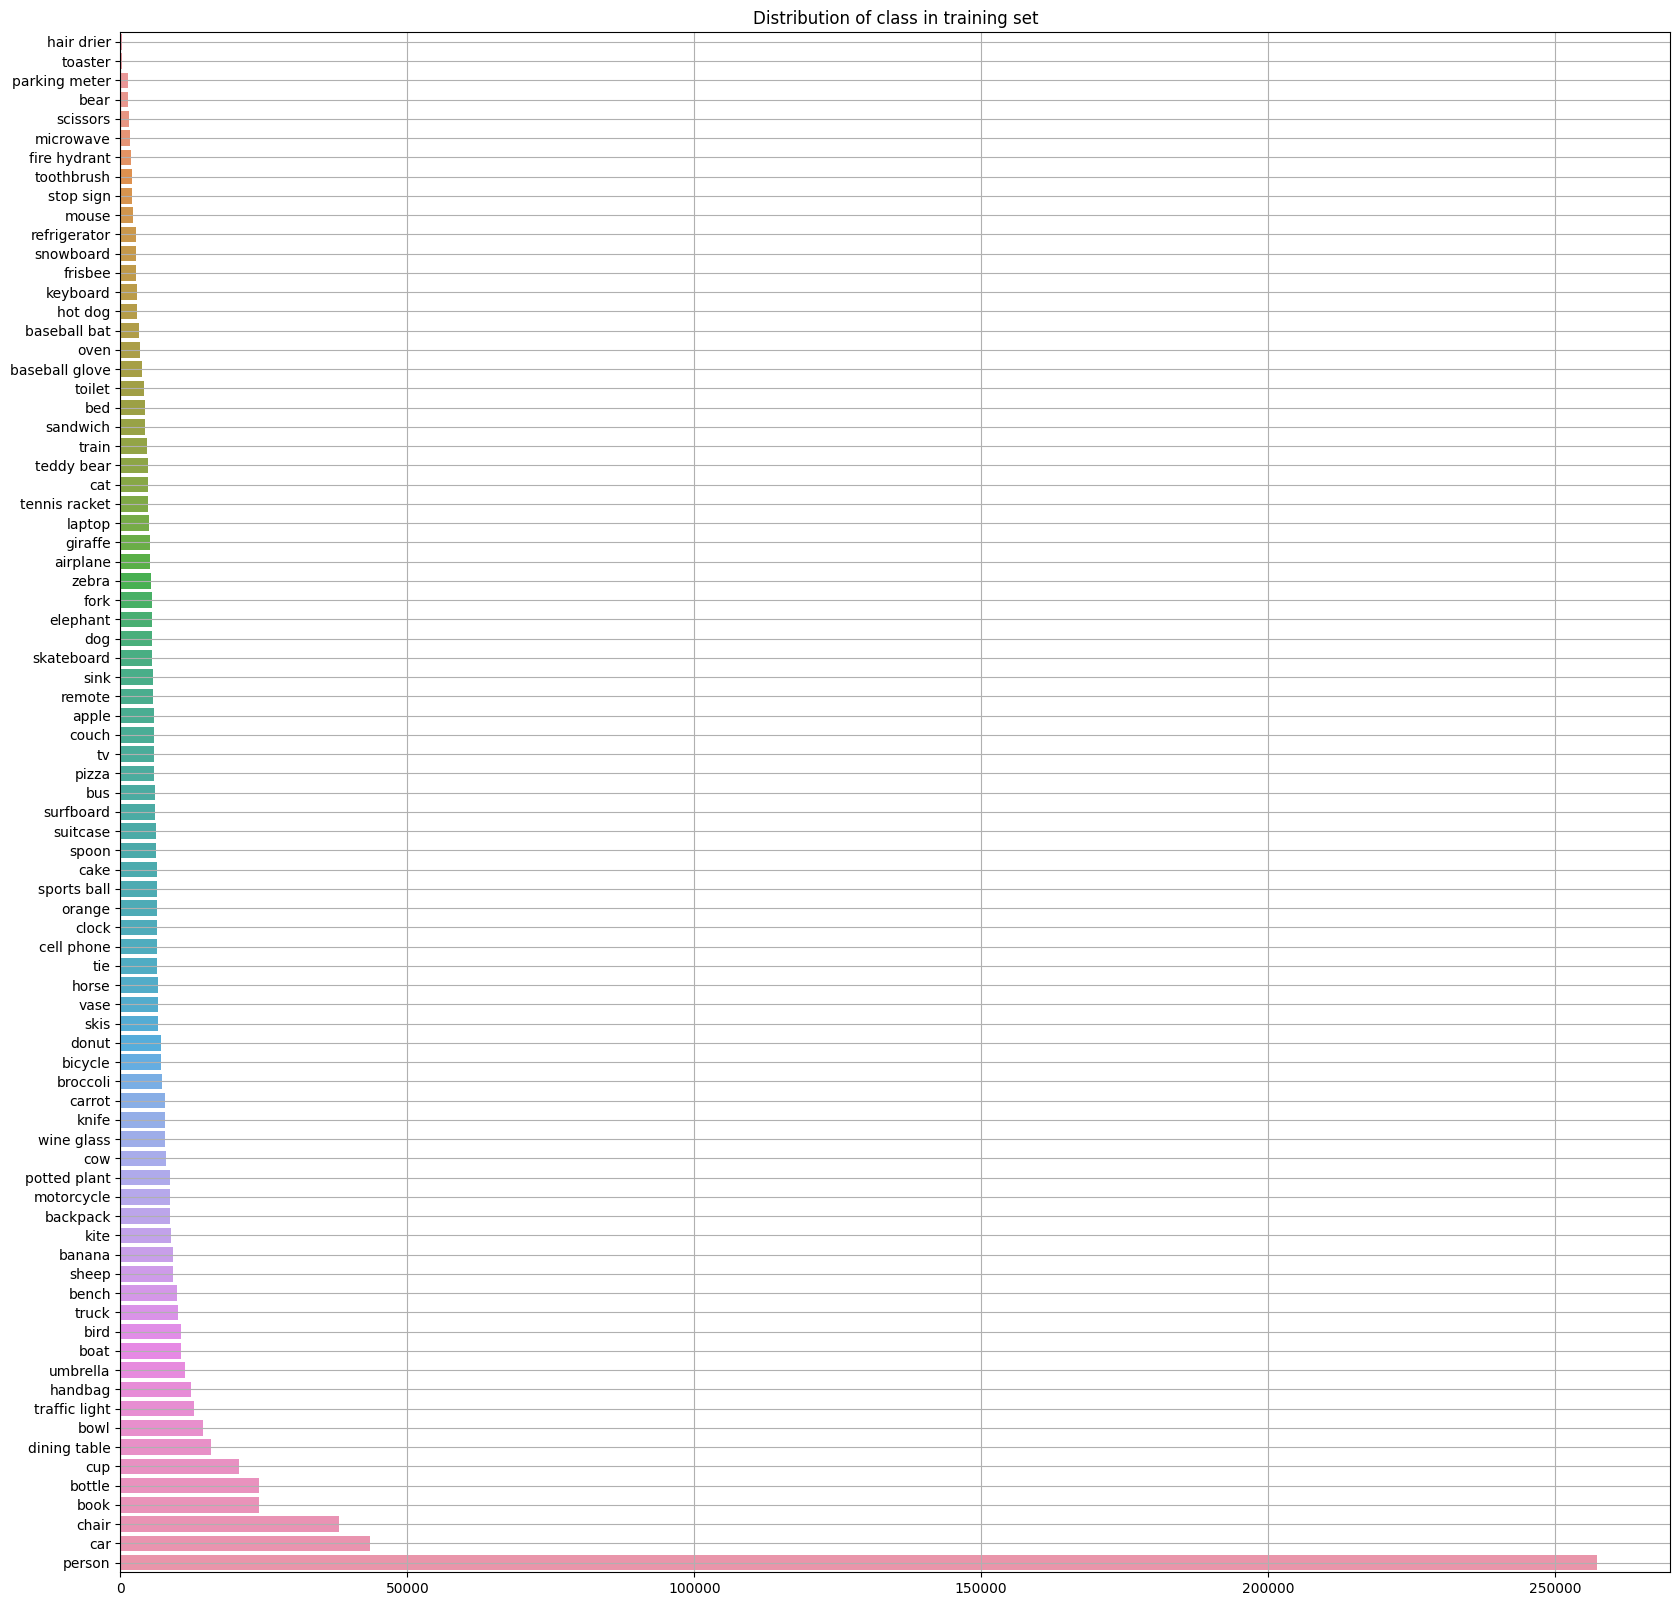

In [59]:
for label_file in sorted(os.listdir(train_path)):
    label_file_path = open(os.path.join(train_path, label_file))
    for line in label_file_path.readlines():
        cls, x, y, w, h = line.strip().split()
        class_name = coco_label[int(cls)]
        if class_name not in coco80_train:
            coco80_train[class_name] = 1
        else:
            coco80_train[class_name] += 1

coco80_train = dict(sorted(coco80_train.items(), key=lambda item: item[1]))
classes = list(coco80_train.keys())
count = list(coco80_train.values())

plt.figure(figsize=(20, 20))
sns.barplot(y = classes, x= count, orient='h')
plt.grid(True)
plt.title("Distribution of class in training set")

### Resample training set

In [60]:
sampled_data_train = {}

for cls, cnt in coco80_train.items():
    if cnt >= 1000:
        sampled_data_train[cls] = int(cnt * 0.3)
    else:
        sampled_data_train[cls] = int(cnt * 0.5)

sampled_train = []
for label_file in sorted(os.listdir(train_path)):
    label_file_path = open(os.path.join(train_path, label_file))
    flag = True
    one_file = {}
    for line in label_file_path.readlines():
        cls, x, y, w, h = line.strip().split()
        class_name = coco_label[int(cls)]
        if class_name not in one_file:
            one_file[class_name] = 1
        else:
            one_file[class_name] += 1

    for k, v in one_file.items():
        if sampled_data_train[k] - v < 0:
            flag = False
            break
    if flag:
        for k, v in one_file.items():
            sampled_data_train[k] -= v
        sampled_train.append(label_file)

print("Total file after sample:", len(sampled_train))

Total file after sample: 35827


In [75]:
import shutil

img_path = '/home/son/Desktop/Research/YOLO_ATTACK_GRAD/data'
sampled_data = os.path.join(img_path, 'sampled')

train_img_path = os.path.join(img_path, 'train2017')
val_img_path = os.path.join(img_path, 'val2017')

train_sampled_img = os.path.join(sampled_data, 'train', 'images')
train_sampled_labels = os.path.join(sampled_data, 'train', 'labels')

val_sampled_img = os.path.join(sampled_data, 'val', 'images')
val_sampled_labels = os.path.join(sampled_data, 'val', 'labels')

os.makedirs(train_sampled_img, exist_ok = True)
os.makedirs(train_sampled_labels, exist_ok = True)
os.makedirs(val_sampled_img, exist_ok = True)
os.makedirs(val_sampled_labels, exist_ok = True)

for label_name in sampled_train:
    img_name = label_name.split(".")[0] + '.jpg'
    label_path = os.path.join(train_path, label_name)
    img_path = os.path.join(train_img_path, img_name)
    
    #Copy img to new dir
    dest_path_img = os.path.join(train_sampled_img, img_name)
    shutil.copy(img_path, dest_path_img)

    #Copy label to new dir
    dest_path_label = os.path.join(train_sampled_labels, label_name)
    shutil.copy(label_path, dest_path_label)


In [78]:
for label_name in sampled_val:
    img_name = label_name.split(".")[0] + '.jpg'
    label_path = os.path.join(val_path, label_name)
    img_path = os.path.join(val_img_path, img_name)
    
    #Copy img to new dir
    dest_path_img = os.path.join(val_sampled_img, img_name)
    shutil.copy(img_path, dest_path_img)

    #Copy label to new dir
    dest_path_label = os.path.join(val_sampled_labels, label_name)
    shutil.copy(label_path, dest_path_label)

Text(0.5, 1.0, 'Height and Width of image in training set')

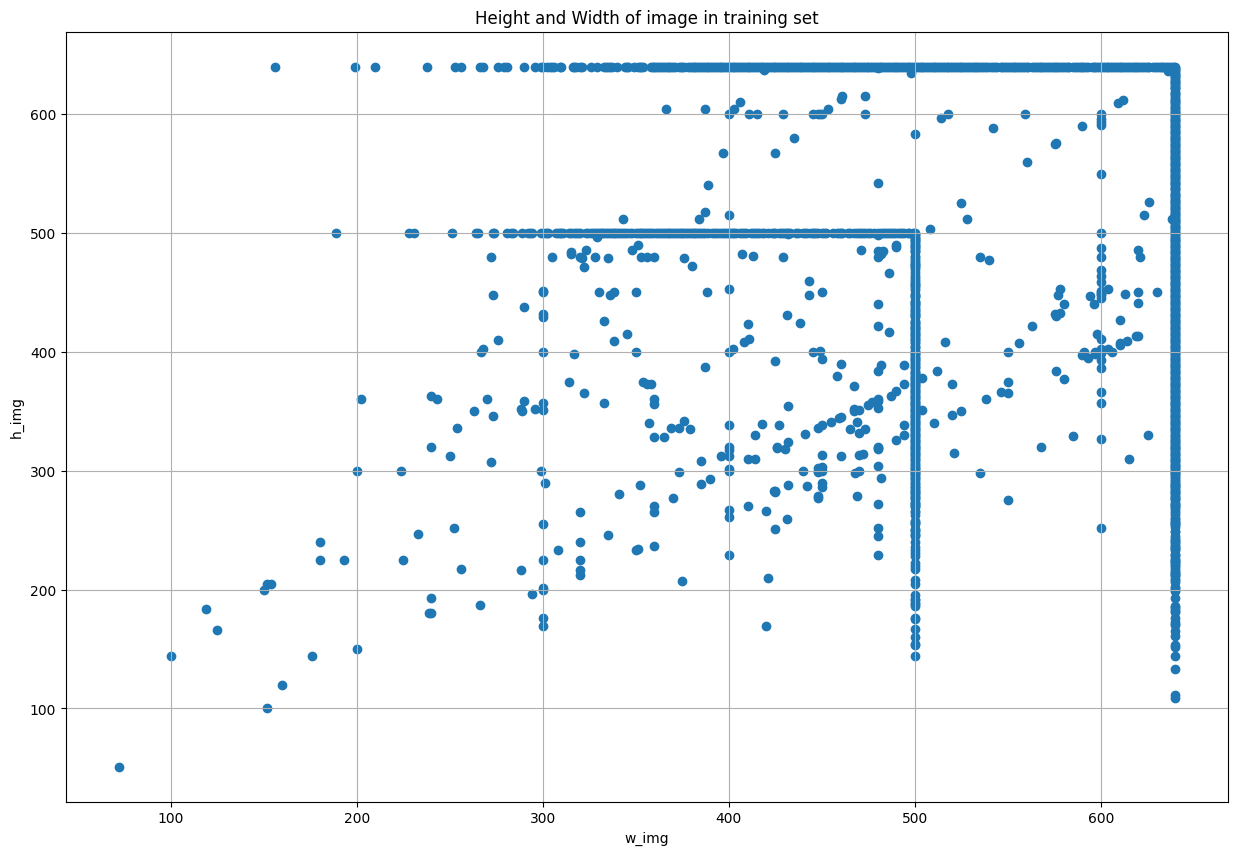

In [70]:
w_h = set()

for label_name in sampled_train:
    img_name = label_name.split(".")[0] + '.jpg'
    img_path = os.path.join(train_data_path, img_name)
    w, h = imagesize.get(img_path)
    w_h.add((w, h))

x_values = [point[0] for point in w_h]
y_values = [point[1] for point in w_h]

# Create the scatter plot
plt.figure(figsize=(15, 10))
plt.scatter(x_values, y_values)
plt.xlabel('w_img')
plt.ylabel('h_img')
plt.grid(True)
plt.title('Height and Width of image in training set')

Text(0.5, 1.0, 'Distribution of class in validation set')

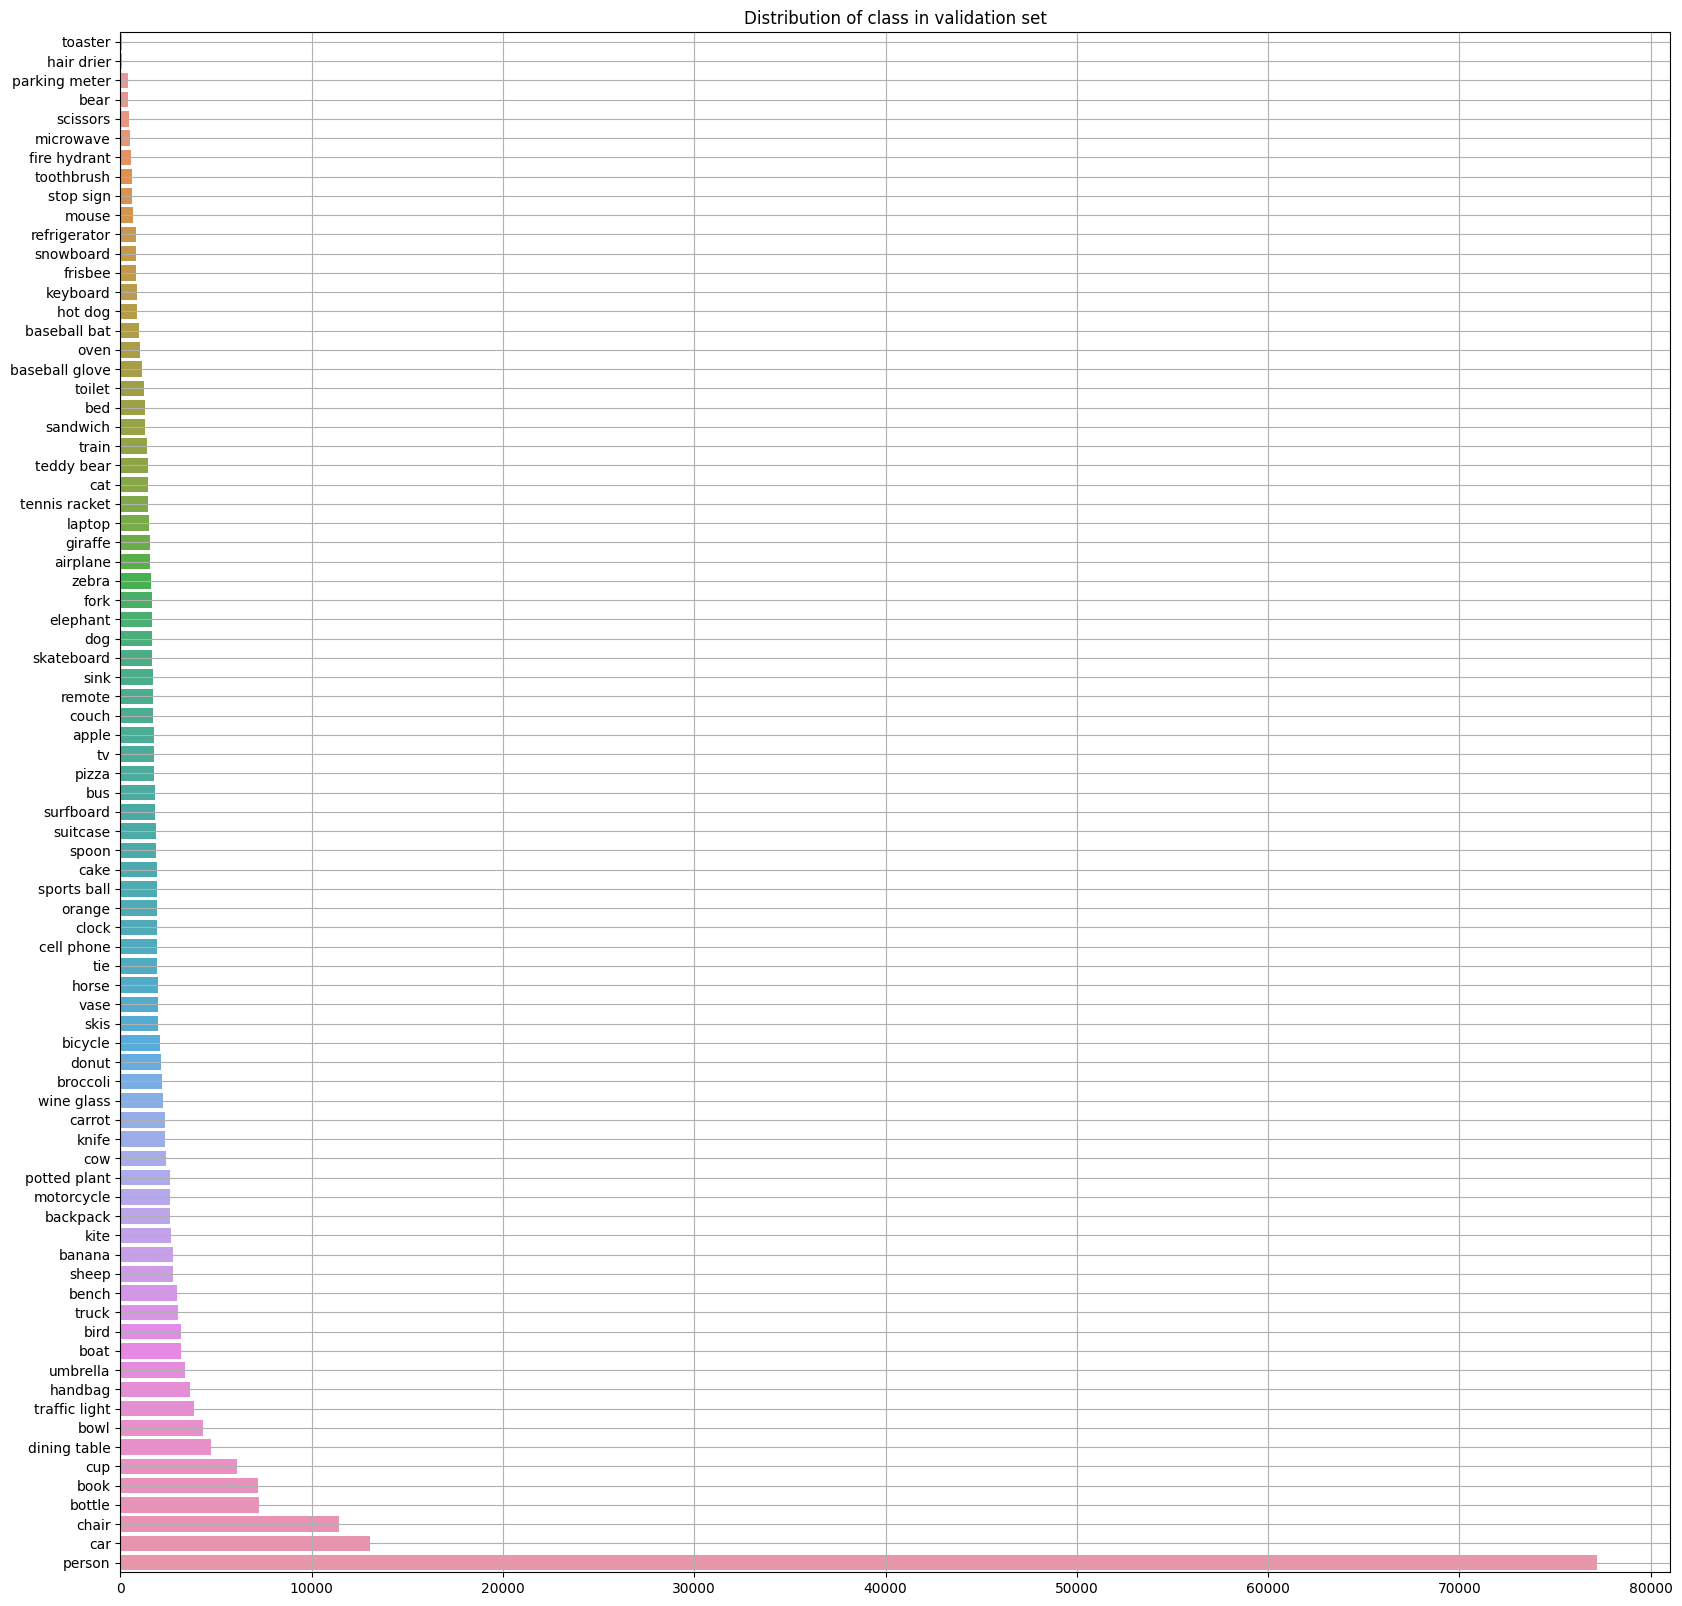

In [62]:
sampled_coco80_train = {}

for label_file in sampled_train:
    label_file_path = open(os.path.join(train_path, label_file))
    for line in label_file_path.readlines():
        cls, x, y, w, h = line.strip().split()
        class_name = coco_label[int(cls)]
        if class_name not in sampled_coco80_train:
            sampled_coco80_train[class_name] = 1
        else:
            sampled_coco80_train[class_name] += 1
            
sampled_coco80_train = dict(sorted(sampled_coco80_train.items(), key=lambda item: item[1]))
classes = list(sampled_coco80_train.keys())
count = list(sampled_coco80_train.values())

plt.figure(figsize=(20, 20))
sns.barplot(y = classes, x= count, orient='h')
plt.grid(True)
plt.title("Distribution of class in validation set")

# Height and Width images distribution

In [8]:
!pip install imagesize

In [65]:
import imagesize

data_path = "../data"
train_data_path = os.path.join(data_path, 'train2017')
val_data_path = os.path.join(data_path, 'val2017')

### Training set

Text(0.5, 1.0, 'Height and Width of image in training set')

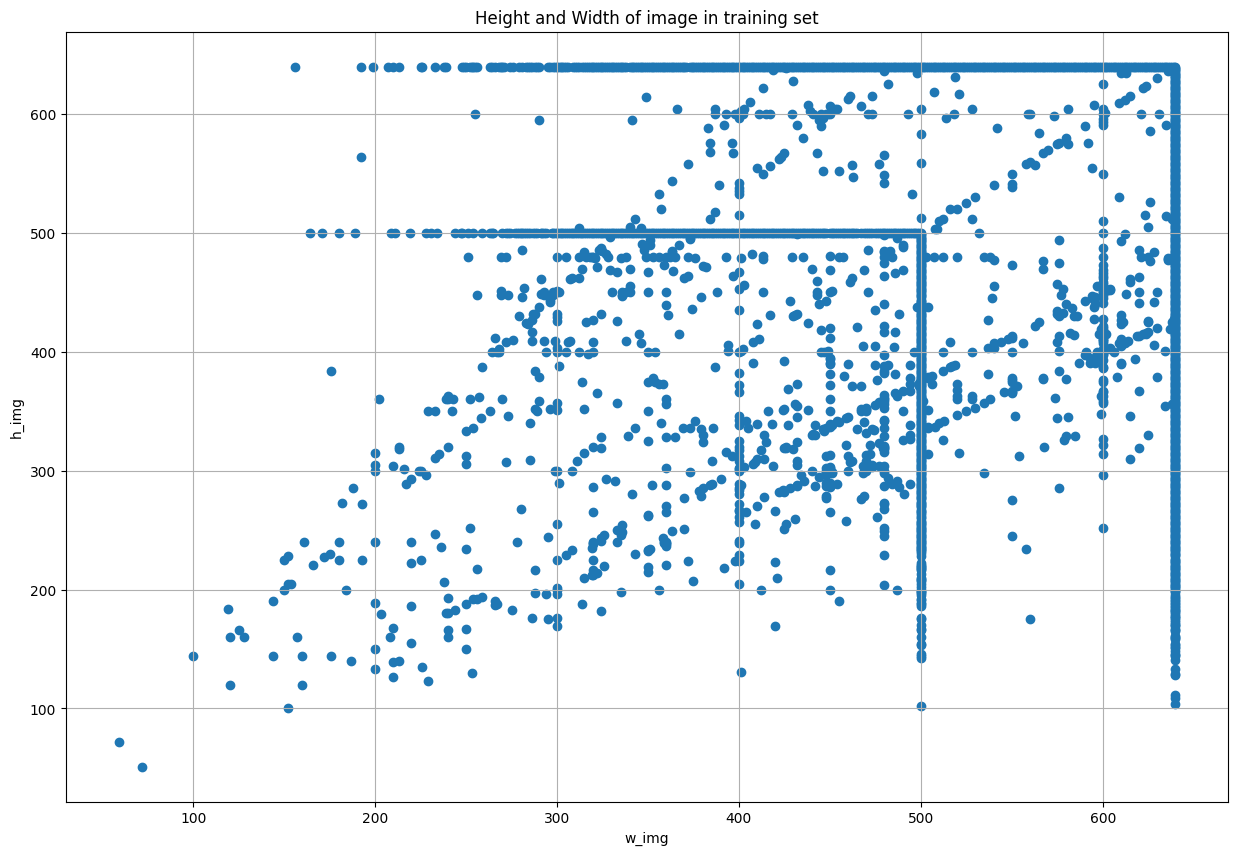

In [34]:
w_h = set()

for img_name in sorted(os.listdir(train_data_path)):
    img_path = os.path.join(train_data_path, img_name)
    w, h = imagesize.get(img_path)
    w_h.add((w, h))

x_values = [point[0] for point in w_h]
y_values = [point[1] for point in w_h]

# Create the scatter plot
plt.figure(figsize=(15, 10))
plt.scatter(x_values, y_values)
plt.xlabel('w_img')
plt.ylabel('h_img')
plt.grid(True)
plt.title('Height and Width of image in training set')

### Validation set

Text(0.5, 1.0, 'Height and Width of image in val set')

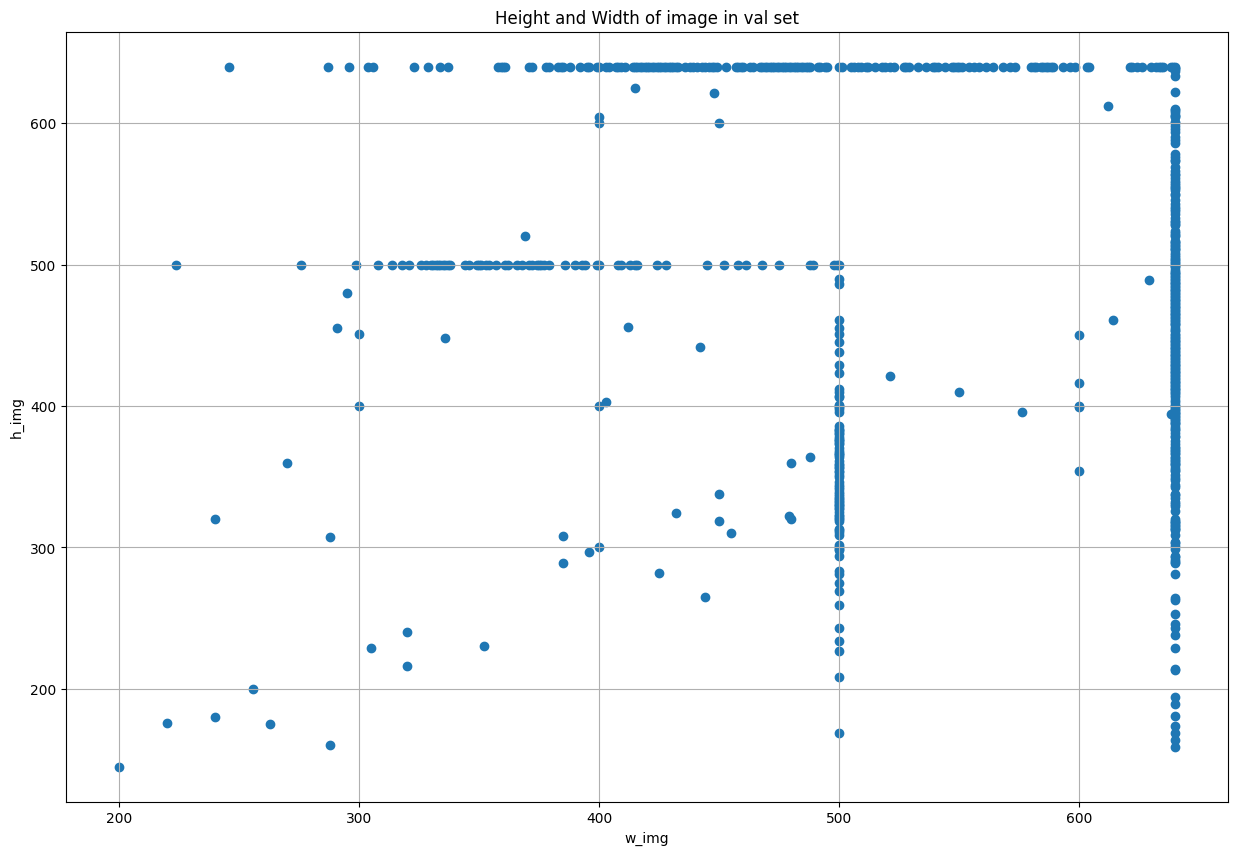

In [33]:
w_h = set()

for img_name in sorted(os.listdir(val_data_path)):
    img_path = os.path.join(val_data_path, img_name)
    w, h = imagesize.get(img_path)
    w_h.add((w, h))

x_values = [point[0] for point in w_h]
y_values = [point[1] for point in w_h]

# Create the scatter plot
plt.figure(figsize=(15, 10))
plt.scatter(x_values, y_values)
plt.xlabel('w_img')
plt.ylabel('h_img')
plt.grid(True)
plt.title('Height and Width of image in val set')